<a href="https://colab.research.google.com/github/Amrutha294/Diabetes-Predection/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded=files.upload()

Saving diabetes_data.zip to diabetes_data (1).zip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
import zipfile
warnings.filterwarnings('ignore')
df = pd.read_csv(r"diabetes_data.zip",encoding="windows-1252")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.shape

(768, 9)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [15]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [16]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [17]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['Outcome']
Continuous Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [18]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

In [19]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

In [20]:
for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.xticks(rotation = 90)
    plt.show()

In [21]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

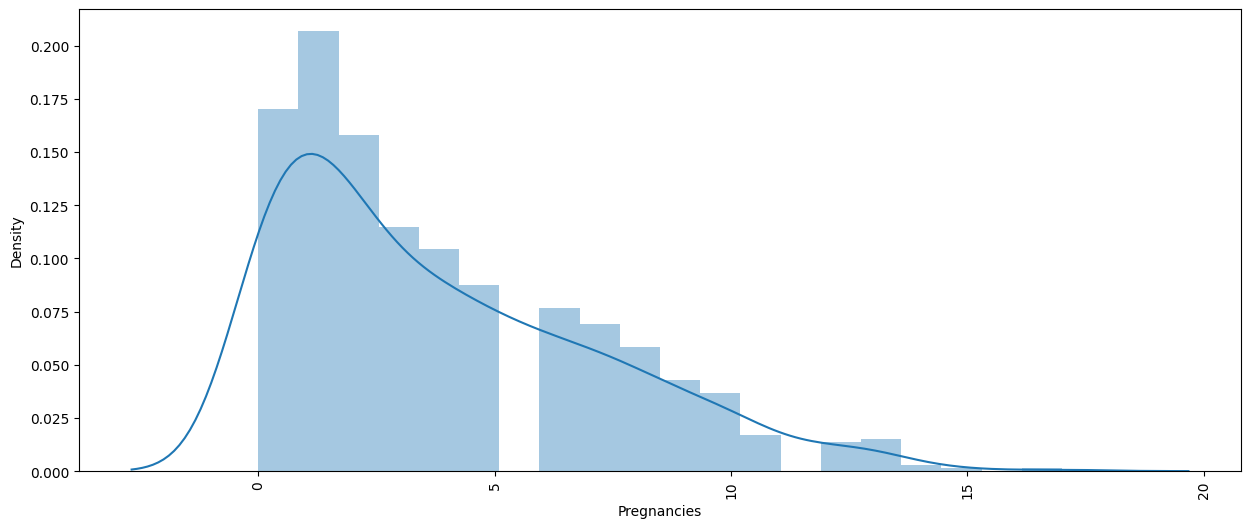

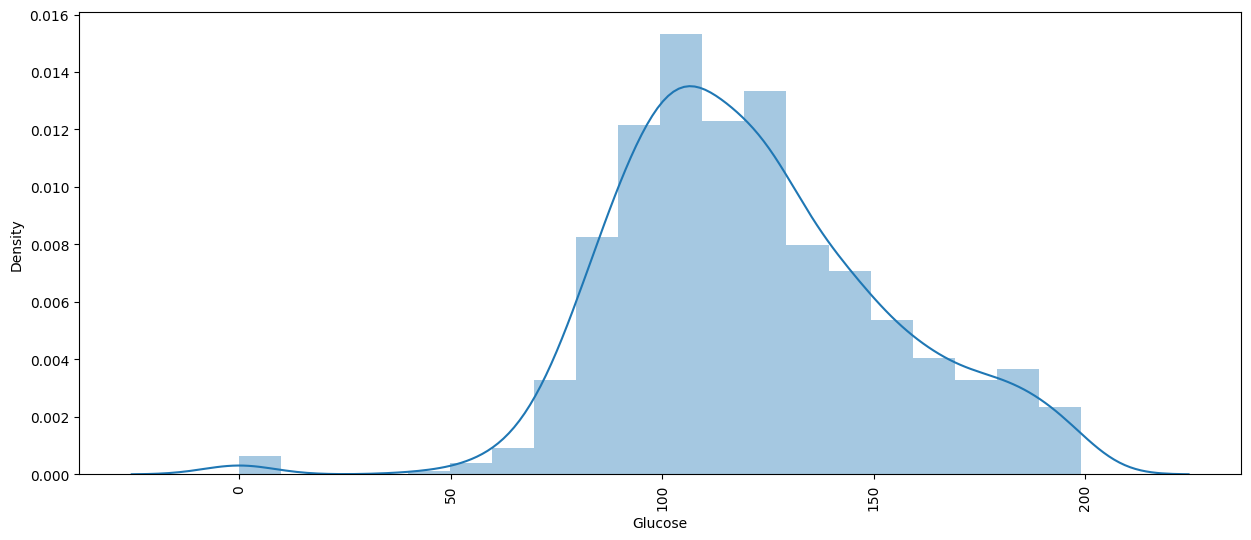

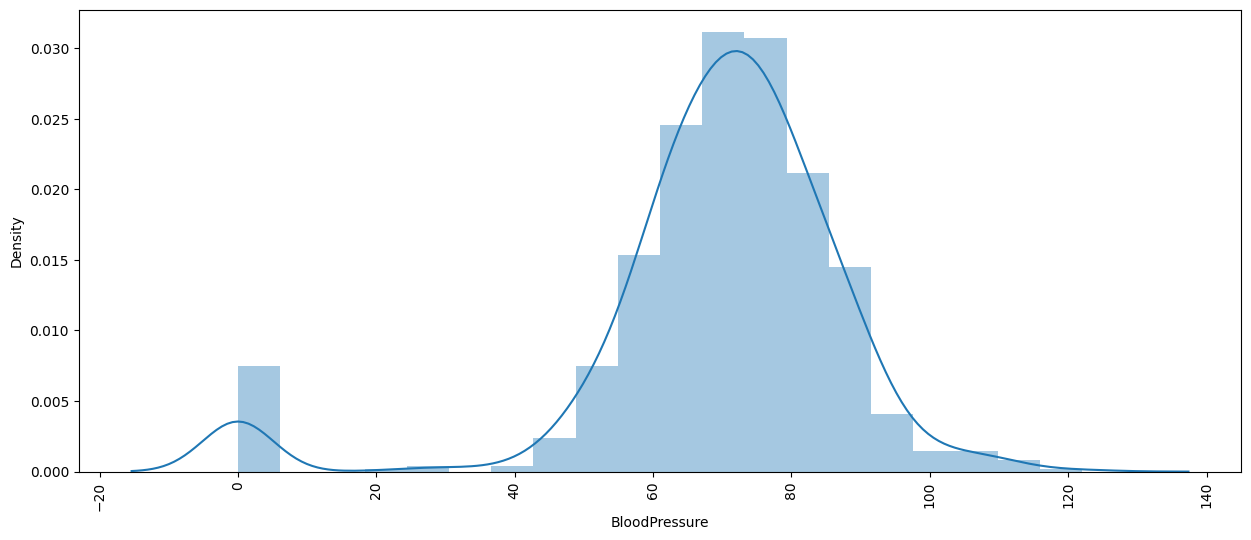

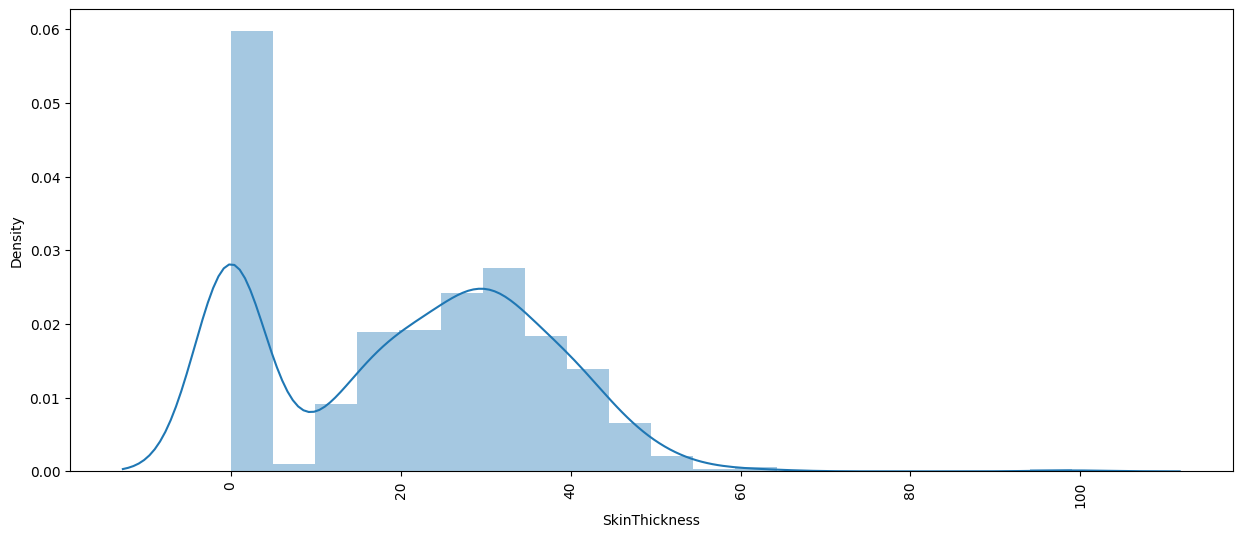

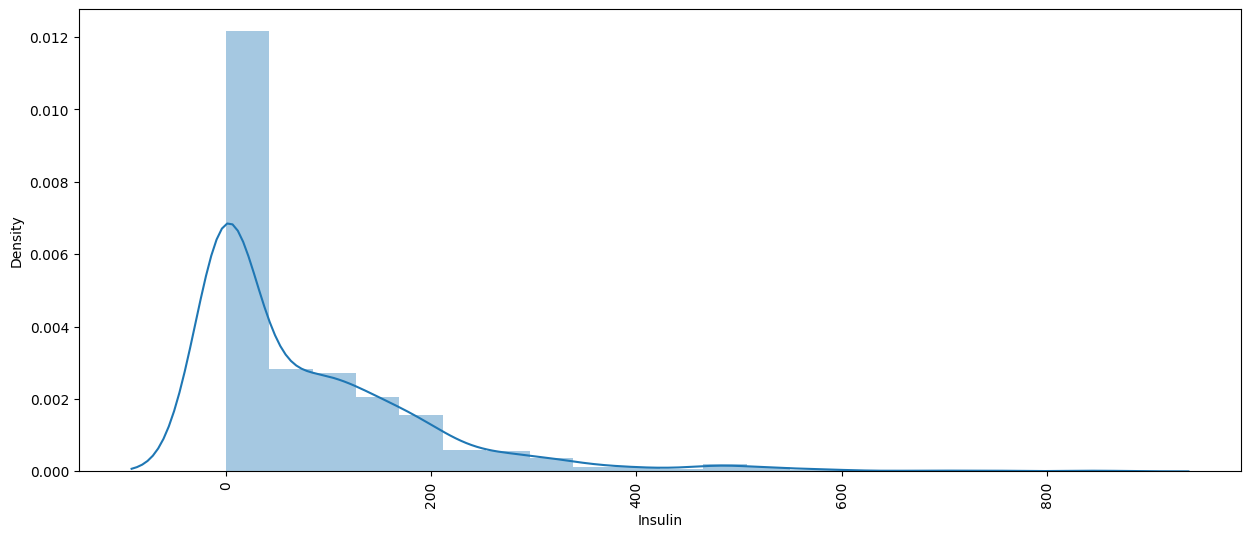

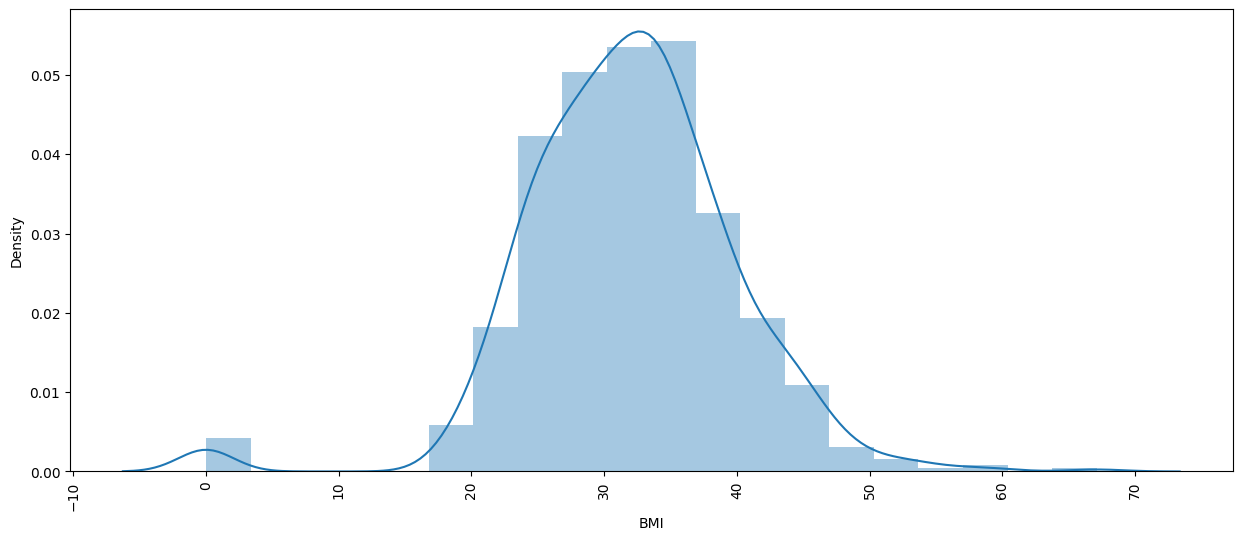

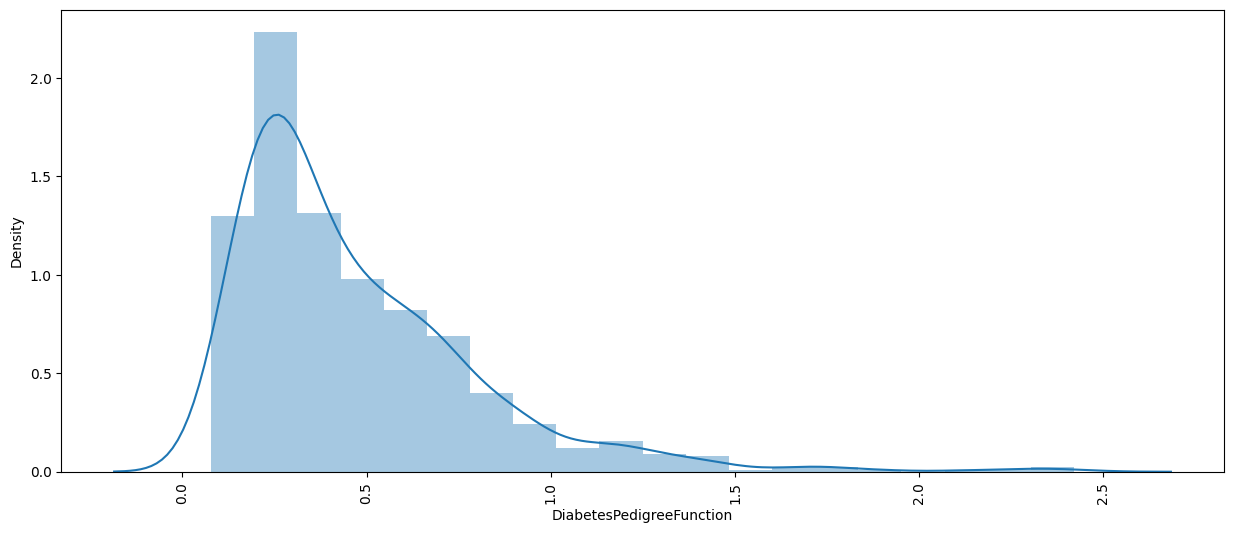

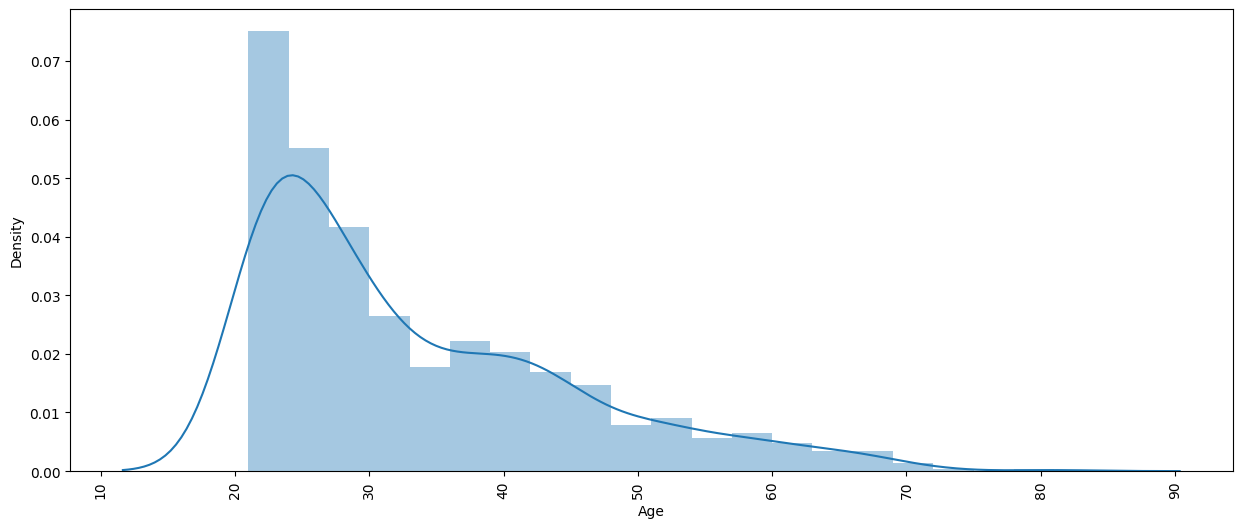

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

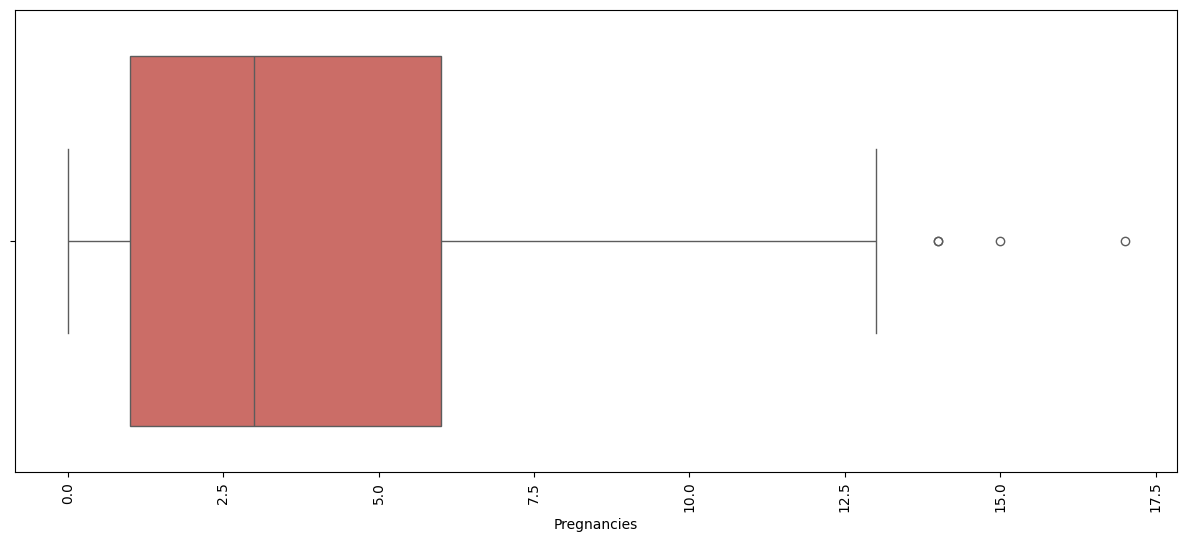

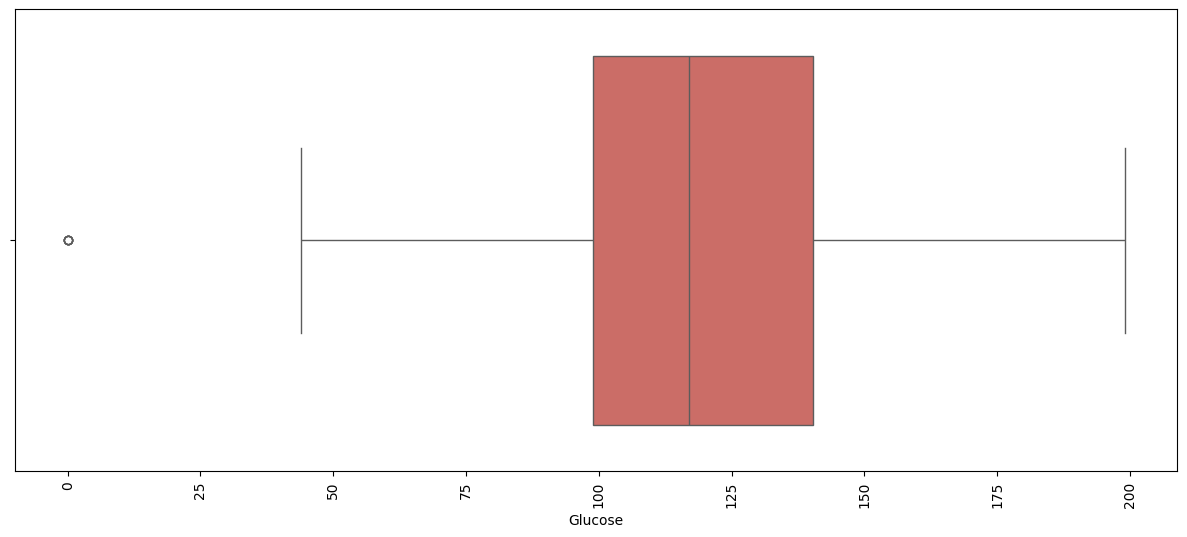

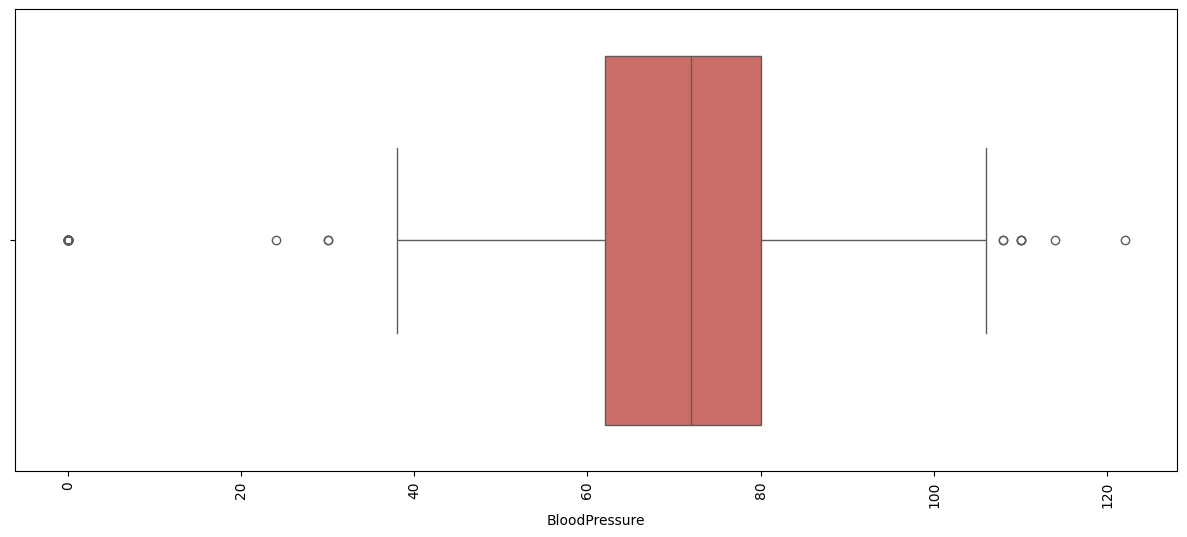

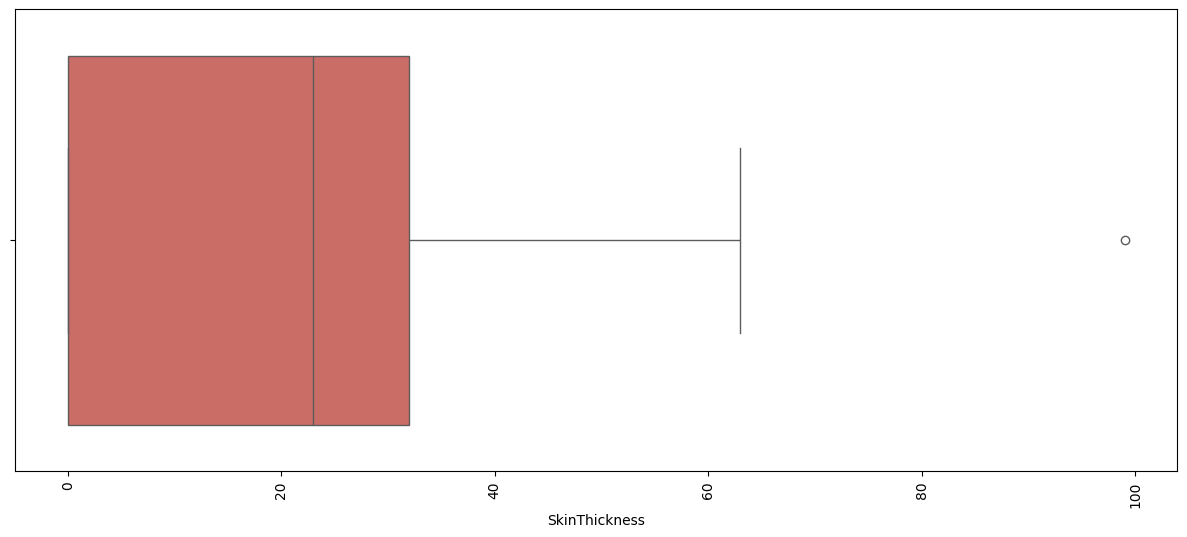

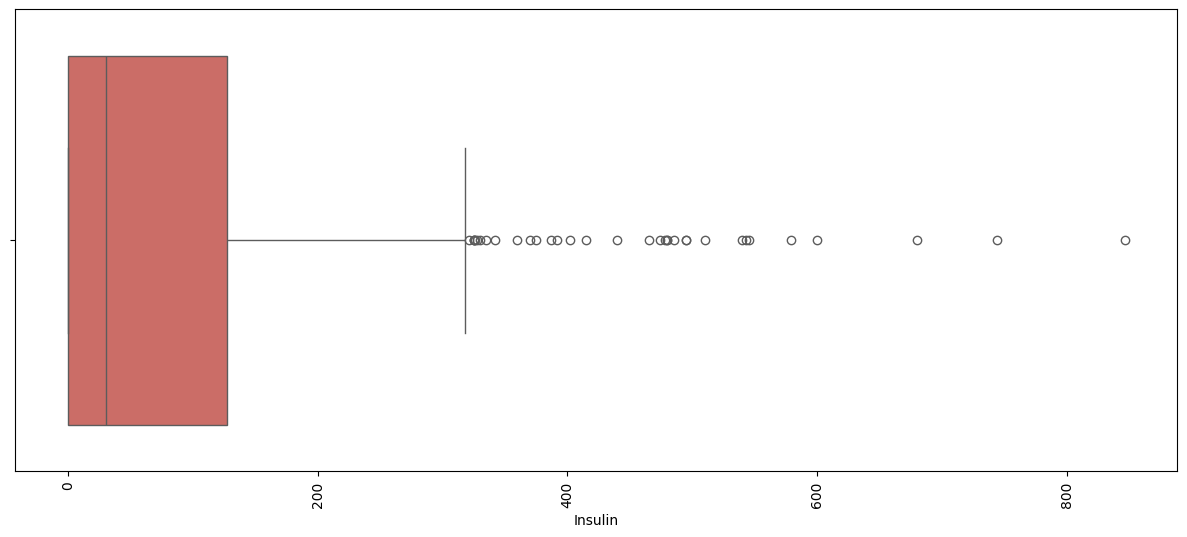

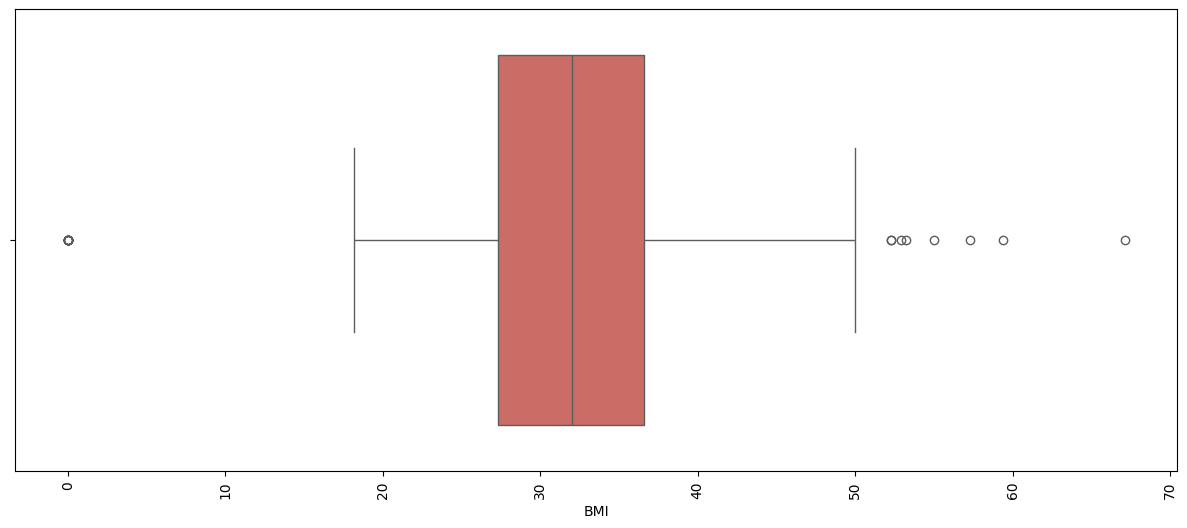

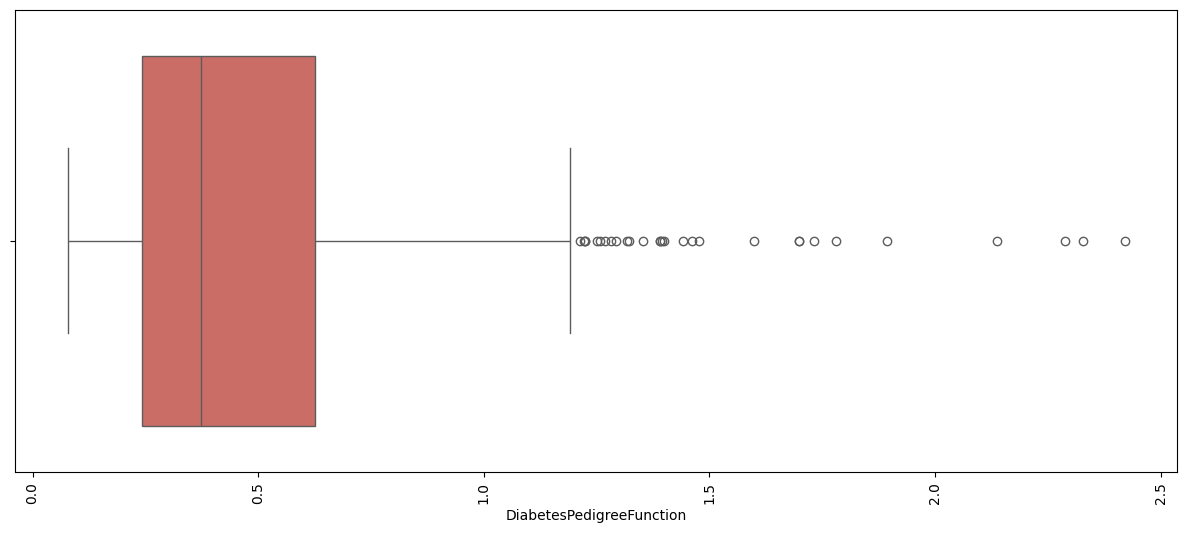

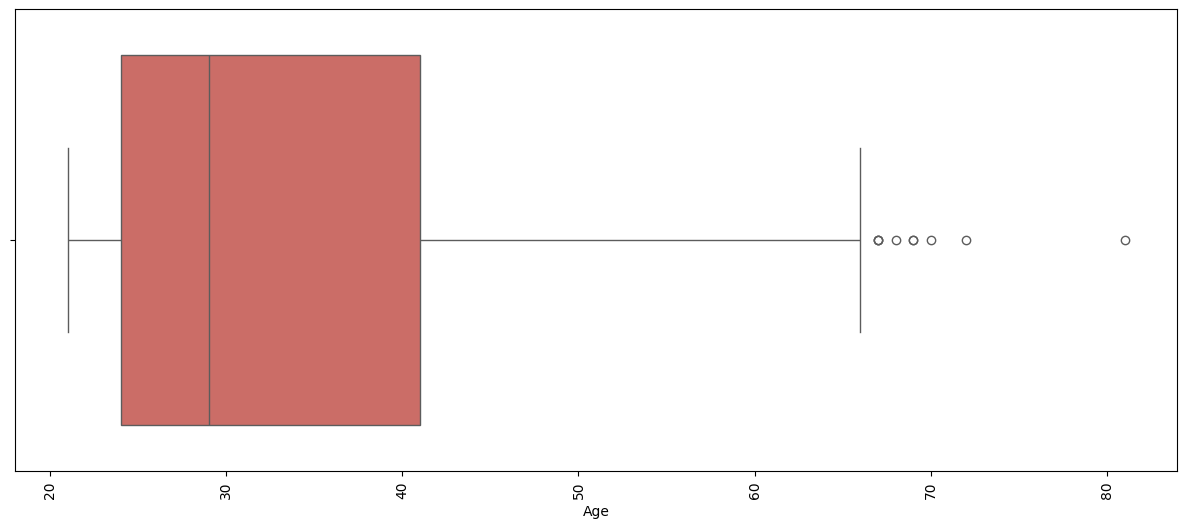

In [23]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

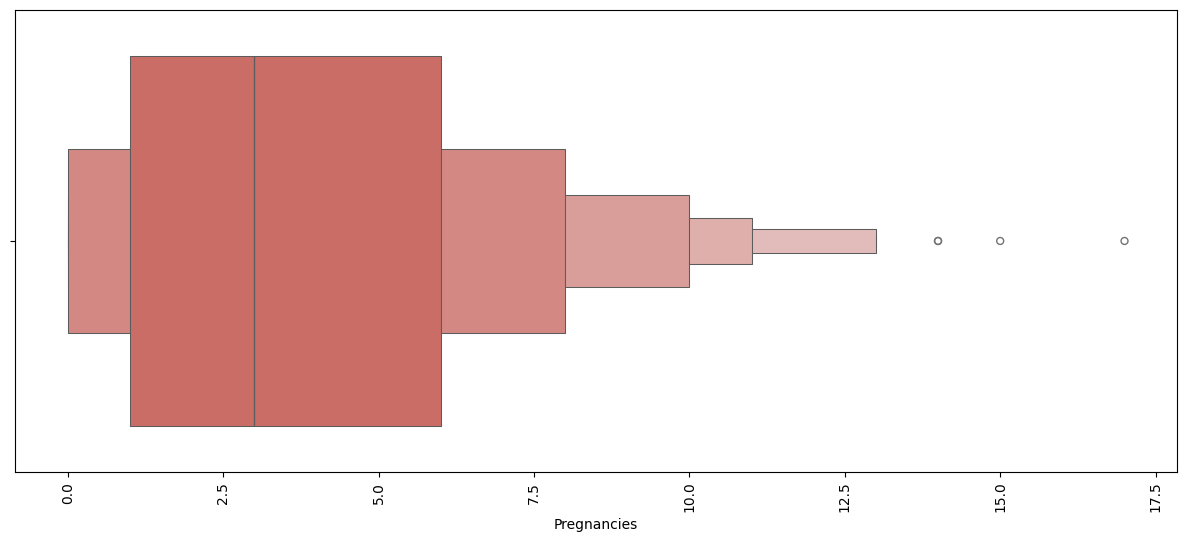

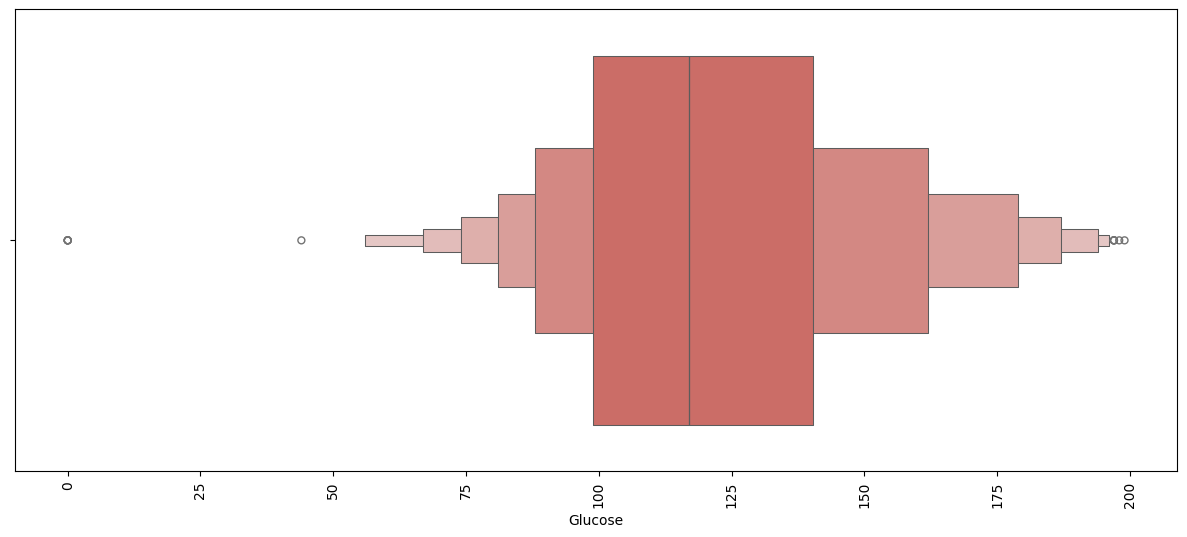

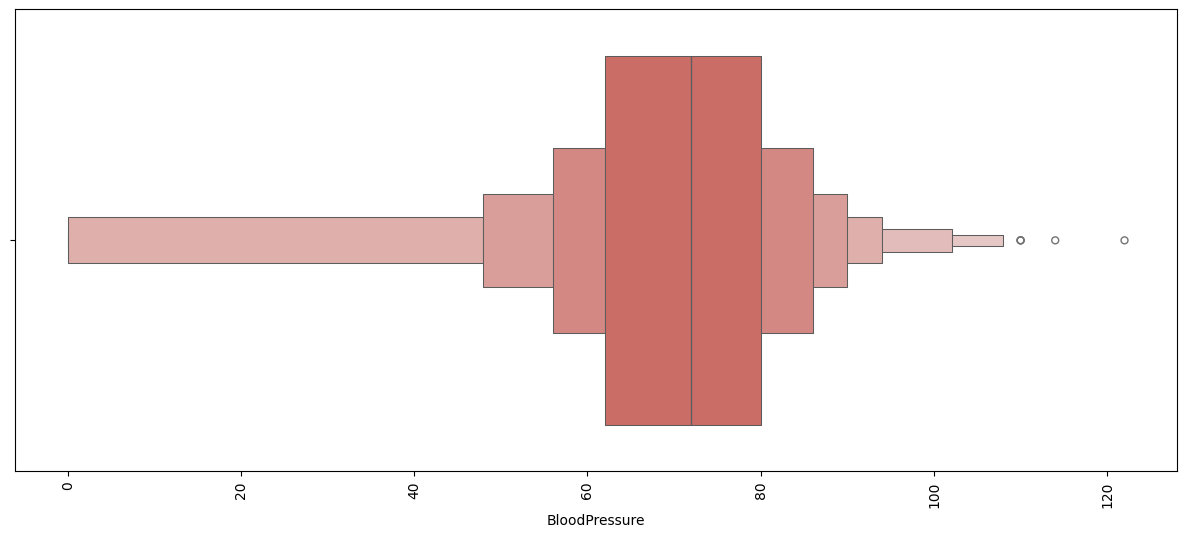

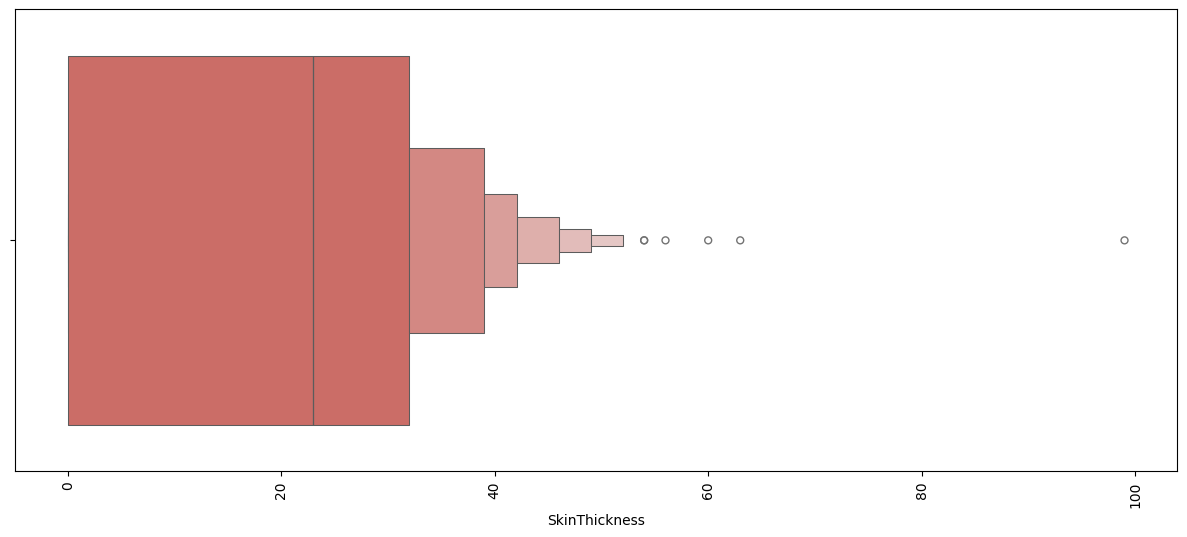

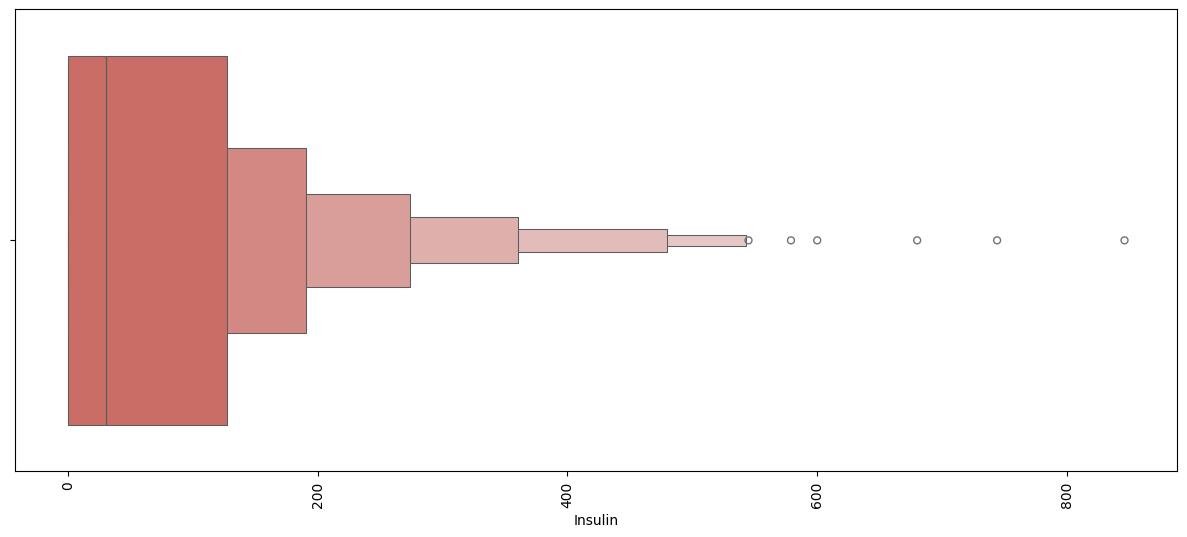

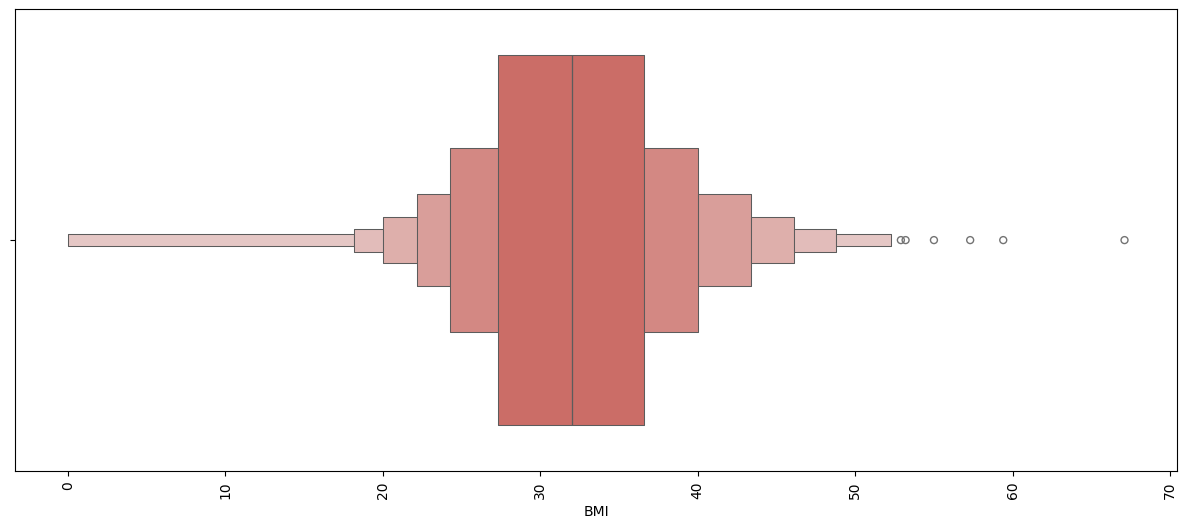

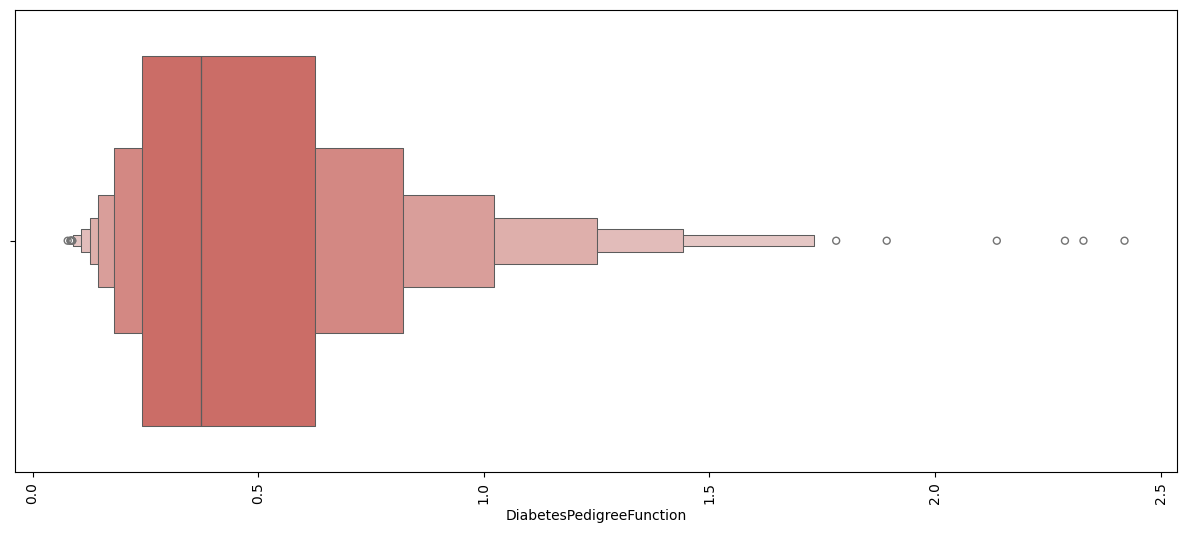

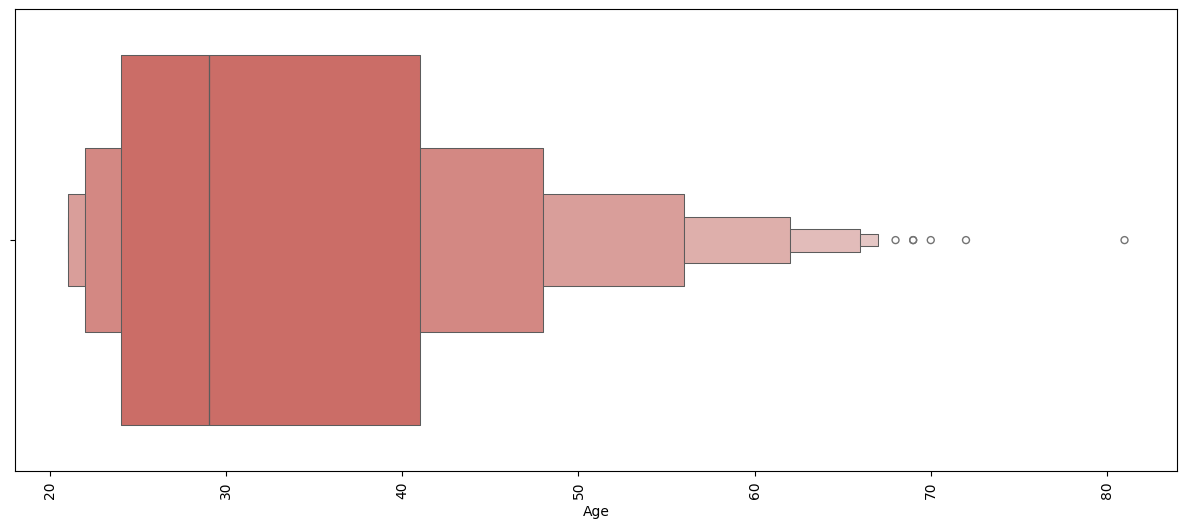

In [24]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

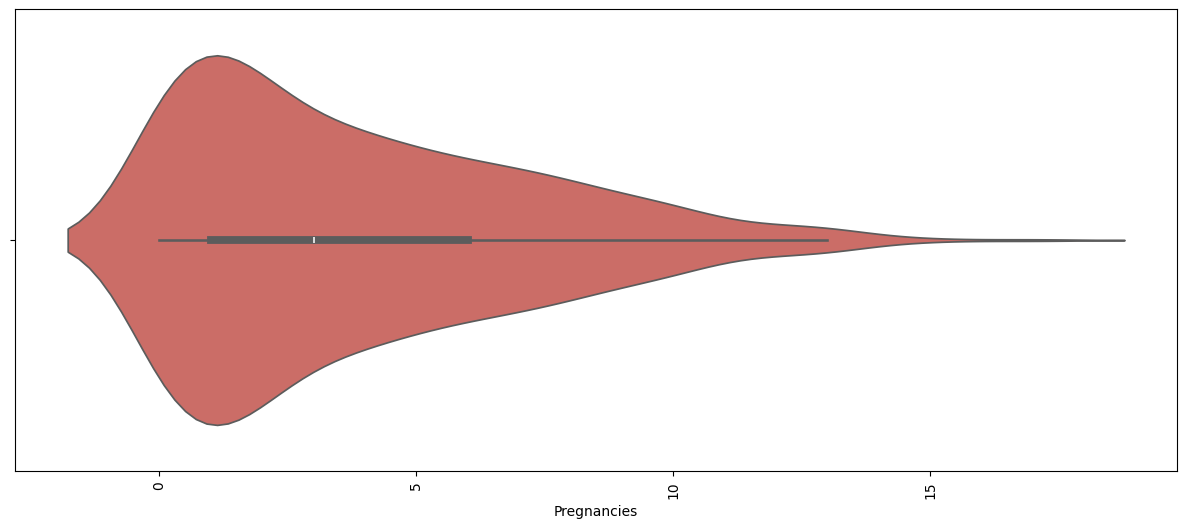

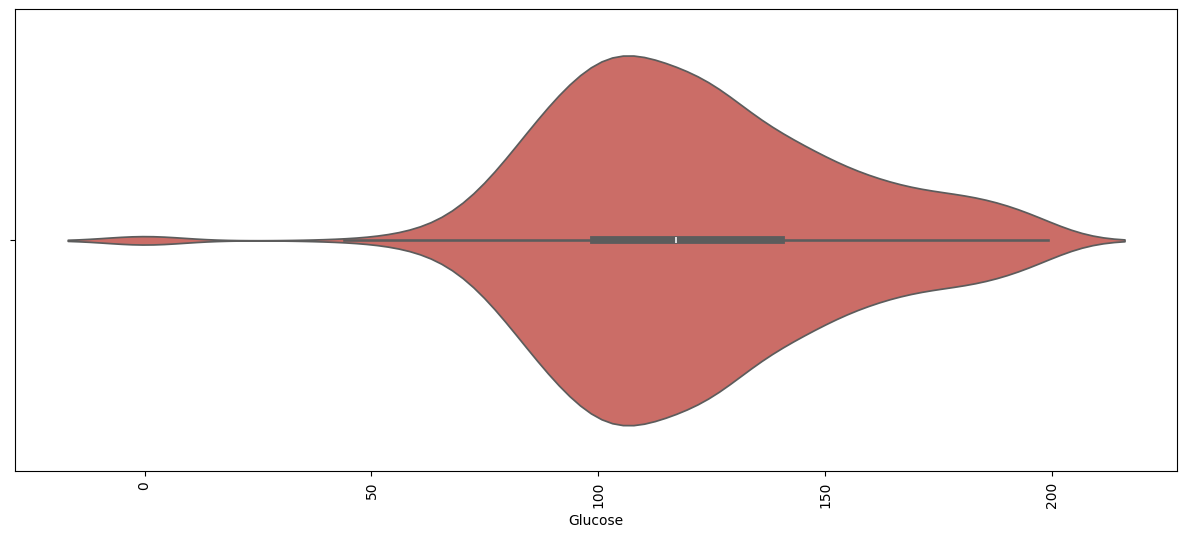

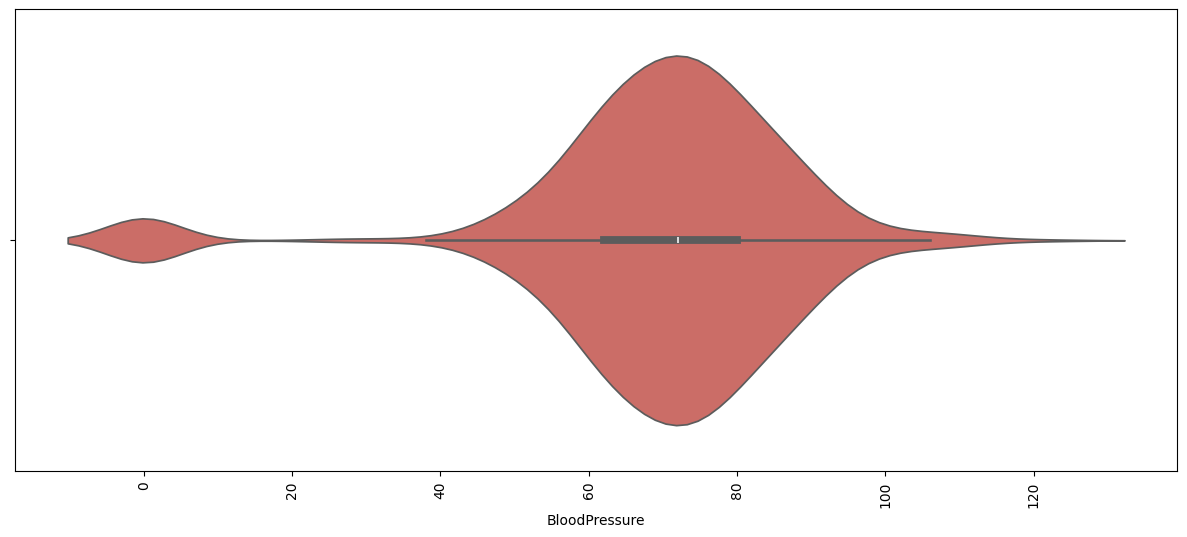

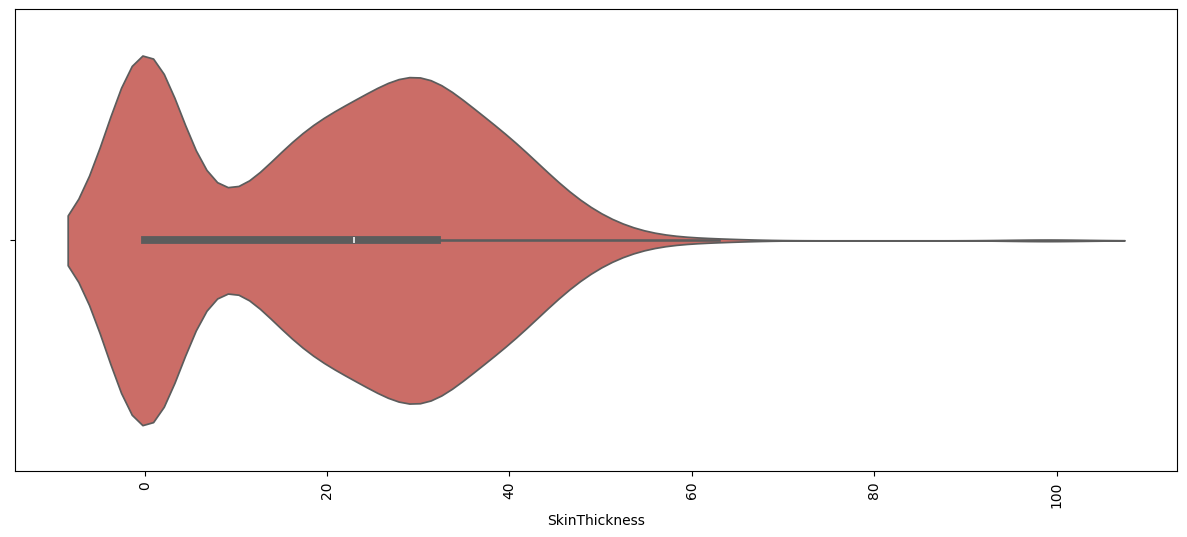

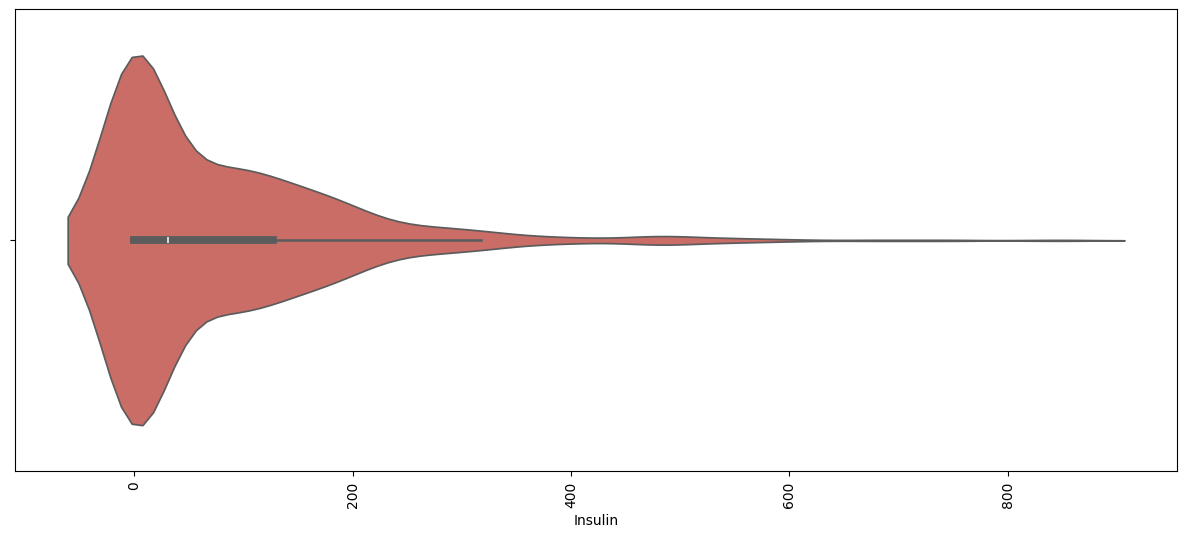

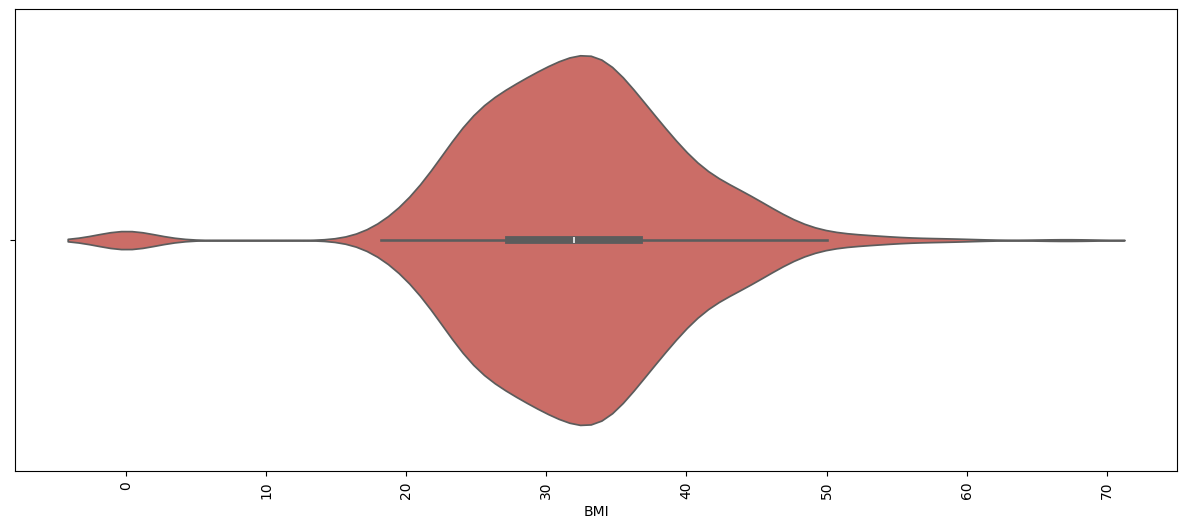

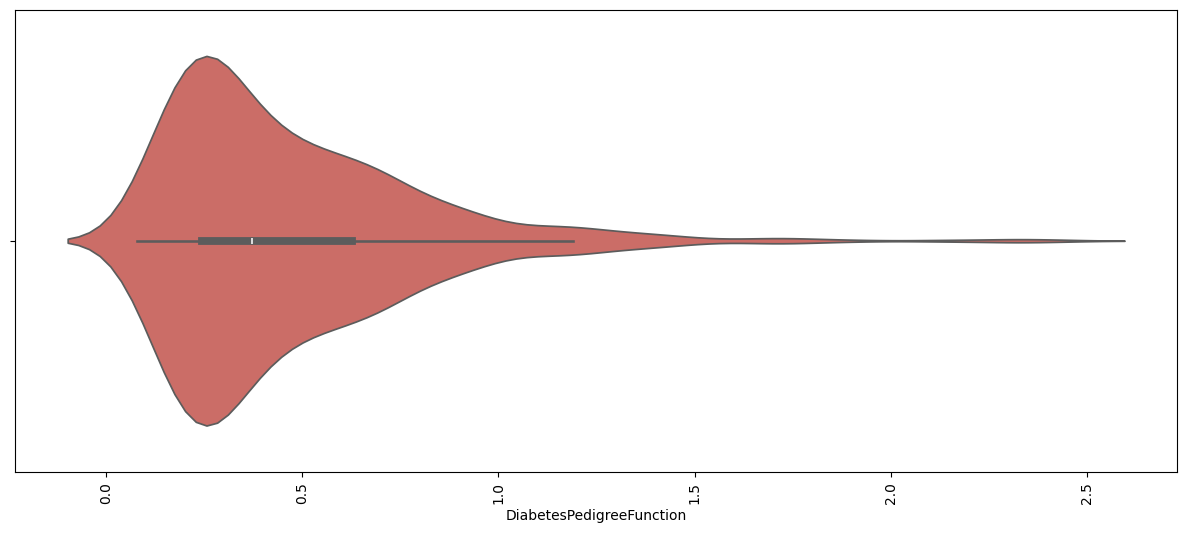

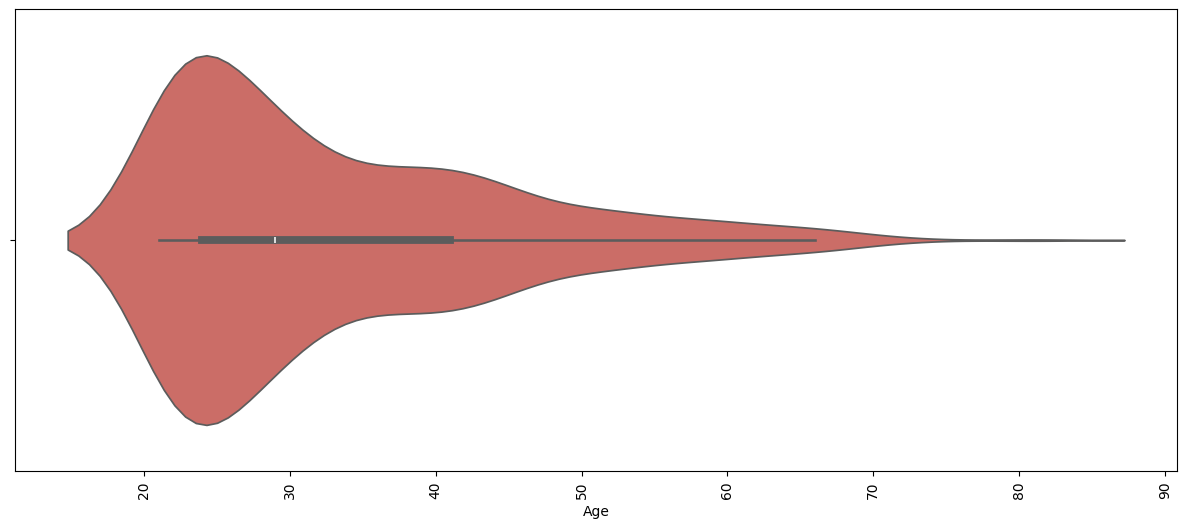

In [25]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

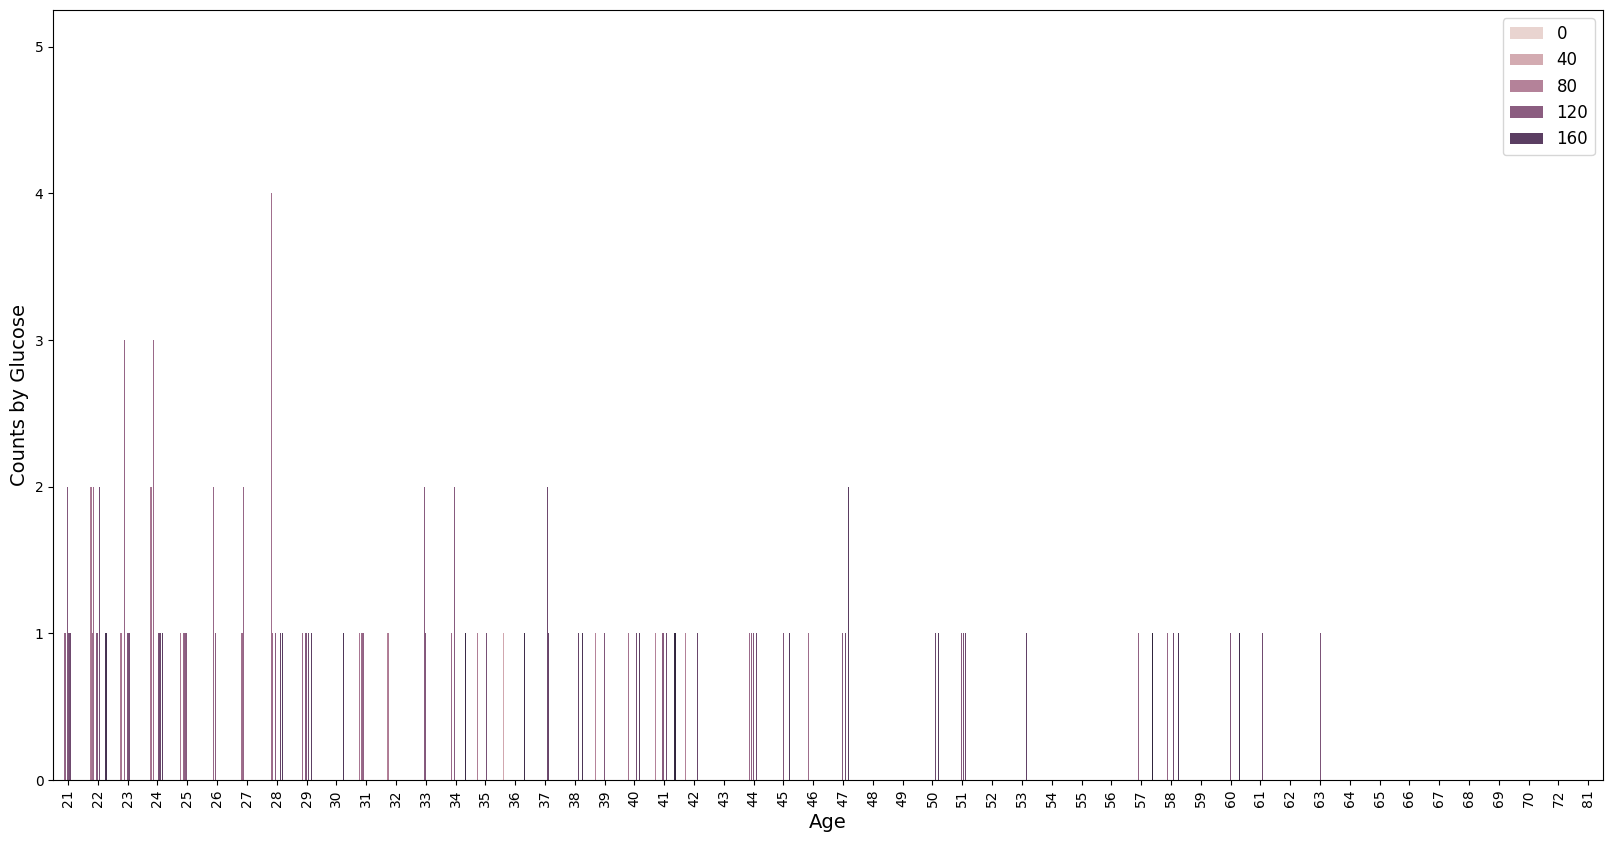

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['Age'],hue = df['Glucose'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Counts by Glucose', fontsize=14)
plt.legend(fontsize=12)
plt.show()

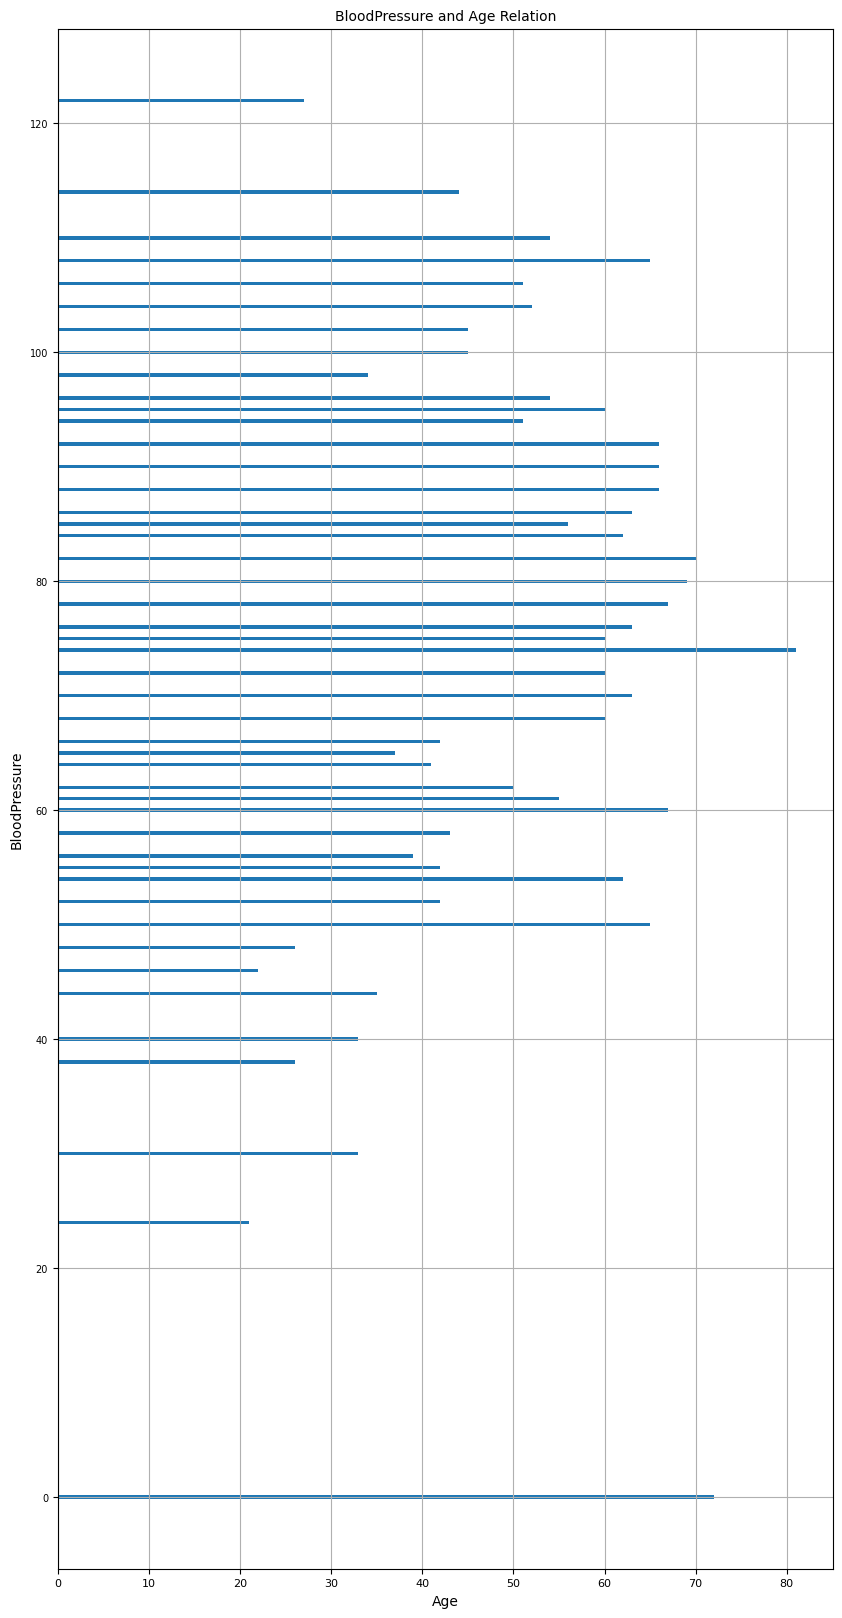

In [27]:
plt.figure(figsize=(10, 20))
plt.barh(df['BloodPressure'], df['Age'], height=0.3, align='center')
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.xlabel('Age', fontsize=10)
plt.ylabel('BloodPressure', fontsize=10)
plt.title('BloodPressure and Age Relation', fontsize=10)
plt.grid()
plt.show()

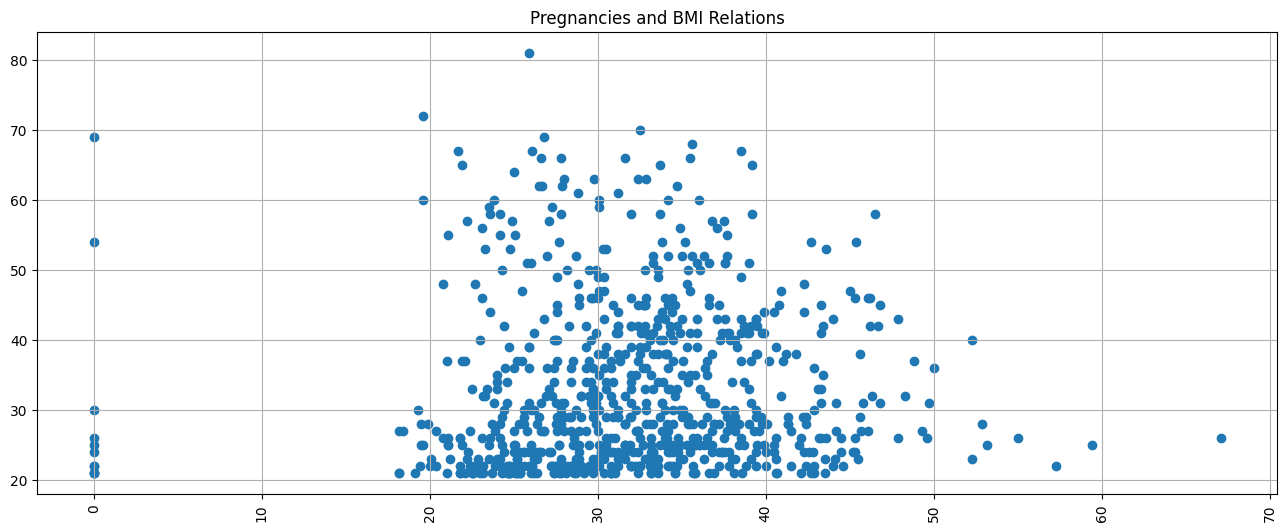

In [28]:
plt.figure(figsize=(16,6))
plt.scatter(df['BMI'],df['Age'])
plt.xticks(rotation=90)
plt.title('Pregnancies and BMI Relations')
plt.grid()
plt.show()

In [29]:
pivot_table = df.pivot_table(index=['SkinThickness'], values=['Age'], aggfunc=['mean', 'count'])
print(pivot_table)

                    mean count
                     Age   Age
SkinThickness                 
0              37.251101   227
7              52.000000     2
8              28.500000     2
10             22.200000     5
11             24.333333     6
12             29.571429     7
13             23.272727    11
14             23.833333     6
15             30.357143    14
16             26.166667     6
17             27.571429    14
18             31.450000    20
19             29.611111    18
20             28.615385    13
21             29.200000    10
22             27.750000    16
23             28.909091    22
24             35.000000    12
25             29.937500    16
26             36.562500    16
27             31.608696    23
28             31.000000    20
29             33.764706    17
30             31.555556    27
31             35.105263    19
32             33.000000    31
33             38.800000    20
34             35.125000     8
35             29.533333    15
36      

In [30]:
one_hot_features = ['Pregnancies', 'BloodPressure', 'BMI']
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])
df['Glucose'] = label_encoder.fit_transform(df['Glucose'])
df['SkinThickness'] = label_encoder.fit_transform(df['SkinThickness'])

In [33]:
df

,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_1,Pregnancies_2,Pregnancies_3,Pregnancies_4,...,BMI_49.6,BMI_49.7,BMI_50.0,BMI_52.3,BMI_52.9,BMI_53.2,BMI_55.0,BMI_57.3,BMI_59.4,BMI_67.1
0,86,28,0,0.627,50,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,23,22,0,0.351,31,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,121,0,0,0.672,32,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,27,16,94,0.167,21,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,75,28,168,2.288,33,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,39,41,180,0.171,63,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
764,60,20,0,0.340,27,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
765,59,16,112,0.245,30,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
766,64,0,0,0.349,47,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [35]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       100
           1       0.61      0.56      0.58        54

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.72      0.72      0.72       154



In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.61      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.70      0.71      0.70       154

